# Исследование объявлений о продаже квартир
### Проведем иследование данных о квартирах предоставленных сайтом Циан 

In [96]:
pip install plotly

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 262.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/15.7 MB 328.2 kB/s eta 0:00:48
   ---------------------------------------- 0.1/15.7 MB 403.5 kB/s eta 0:00:39
   ---------------------------------------- 0.2/15.7 MB 573.4 kB/s eta 0:00:28
    --------------------------------------- 0.2/15.7 MB 692.4 kB/s eta 0:00:23
    --------------------------------------- 0.3/15.7 MB 776.2 kB/s eta 0:00:20
    --------------------------------------- 0.3/15.7 MB 840.2 kB/s eta 0:00:19
    --------------------------------------- 0.4/15.7 MB 897.8 kB/s eta 0:00:18
   - -------------------------------------- 0.5/15.7 MB 909.8 kB/s eta 0:00:17
   - -------------------------------------- 0.6/15.7 MB 1.1 MB/s eta 0:00:14
  

In [41]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

#Загружаем данные 
data = pd.read_csv('C:/Users/admin/all/offers_ALL 1.csv', sep=';')

display(data.head())


,ID,Количество комнат,Тип,район,Адрес,"Площадь, м2",Этаж,Цена,Ремонт,Ссылка на объявление
0,300151528,2.0,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",34.8,4/12,5220000,NaN,https://www.cian.ru/sale/flat/300151528
1,297027698,2.0,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Помяловского...",48.0,5/5,4450000,Косметический,https://www.cian.ru/sale/flat/297027698
2,300140904,2.0,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Сергеева, 5/8",58.7,2/4,5700000,Евроремонт,https://www.cian.ru/sale/flat/300140904
3,295915593,1.0,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Багратиона, ...",43.0,7/9,5990000,Косметический,https://www.cian.ru/sale/flat/295915593
4,295895678,3.0,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",66.1,12/12,7204900,NaN,https://www.cian.ru/sale/flat/295895678


In [43]:
# переименование столбцов для удобного использования 
data = data.rename(columns={'Количество комнат': 'rooms', 
                               'Тип': 'type', 
                               'район': 'district', 
                               'Адрес': 'address', 
                               'Площадь, м2': 'area',
                               'Этаж': 'floor', 
                               'Цена': 'price', 
                               'Ремонт': 'repair', 
                               'Ссылка на объявление': 'link'})
# смотрим основную информацию о датафрейме
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        767 non-null    int64  
 1   rooms     746 non-null    float64
 2   type      767 non-null    object 
 3   district  767 non-null    object 
 4   address   767 non-null    object 
 5   area      767 non-null    float64
 6   floor     767 non-null    object 
 7   price     767 non-null    int64  
 8   repair    86 non-null     object 
 9   link      767 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 60.0+ KB


None

### Перед работой с данными необходимо произвести следующие изменения и анализ данных:
#### 1. Разделим столбец "floor" - возьмем из него информацию за знаком "/" и добавим столбец с данными о количестве этажей


#### 2. Изменим типы объектов в следующих столбцах:
*rooms* - изменить на тип объекта int\
*floor* - изменить на int 

#### 3. Определим количество пропущенных значениях в столбцах

#### 4. Заменим пропуски в столбцах

In [45]:
# добавим столбец 'floor_all'
data['floor_all'] = data['floor'].str.split('/').str.get(1)
data['floor'] = data['floor'].str.split('/').str.get(0)
data.sample(5) 

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all
88,295895652,1,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",33.60,4,4032000,NaN,https://www.cian.ru/sale/flat/295895652,12
445,298600699,1,Продажа квартиры в новостройке,Октябрьский,"Иркутская область, Иркутск, ИВАТУ городок",39.97,2,5445440,NaN,https://www.cian.ru/sale/flat/298600699,16
358,299629882,1,Продажа квартиры в новостройке,Правобережный,"Иркутская область, Иркутск, улица Петрова, 16",40.10,13,6085018,NaN,https://www.cian.ru/sale/flat/299629882,16
250,299629938,1,Продажа квартиры в новостройке,Правобережный,"Иркутская область, Иркутск, улица Петрова, 16",34.35,16,5468266,NaN,https://www.cian.ru/sale/flat/299629938,16
545,298600880,1,Продажа квартиры в новостройке,Октябрьский,"Иркутская область, Иркутск, ИВАТУ городок",36.54,8,5600000,NaN,https://www.cian.ru/sale/flat/298600880,16


In [46]:
# изменим тип данных для дальнейшего исследовани
data['rooms'] = data['rooms'].fillna(0).astype('int')
# data['area'] = data['area'].fillna(0).astype('int')
data['floor'] = data['floor'].fillna(0).astype('int')

In [47]:
display(data.head())
display(data.info())

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all
0,300151528,2,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",34.8,4,5220000,NaN,https://www.cian.ru/sale/flat/300151528,12
1,297027698,2,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Помяловского...",48.0,5,4450000,Косметический,https://www.cian.ru/sale/flat/297027698,5
2,300140904,2,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Сергеева, 5/8",58.7,2,5700000,Евроремонт,https://www.cian.ru/sale/flat/300140904,4
3,295915593,1,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Багратиона, ...",43.0,7,5990000,Косметический,https://www.cian.ru/sale/flat/295915593,9
4,295895678,3,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",66.1,12,7204900,NaN,https://www.cian.ru/sale/flat/295895678,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         767 non-null    int64  
 1   rooms      767 non-null    int32  
 2   type       767 non-null    object 
 3   district   767 non-null    object 
 4   address    767 non-null    object 
 5   area       767 non-null    float64
 6   floor      767 non-null    int32  
 7   price      767 non-null    int64  
 8   repair     86 non-null     object 
 9   link       767 non-null    object 
 10  floor_all  767 non-null    object 
dtypes: float64(1), int32(2), int64(2), object(6)
memory usage: 60.0+ KB


None

In [75]:
# посчитаем пропуски
print('Количество дубликатов:', data.duplicated().sum())
print('Количие пропусков:')
data.isnull().sum() 

Количество дубликатов: 0
Количие пропусков:


ID           0
rooms        0
type         0
district     0
address      0
area         0
floor        0
price        0
repair       0
link         0
floor_all    0
dtype: int64

Пропуски в столбце с ремонтом из-за отсутсивия информации - для работы с эти столбцом необходимо заменить пропущенные значения на 0 как "нет информации о ремонте":

In [51]:
# замена пропусков
data['repair'] = data['repair'].fillna(0)

## Анализ данных
### Какие районы представлены в данных? Исследуем количество объектов по категориям: количество комнат, цена, площадь. Построим визуализации. 

district
Октябрьский      200
Ленинский        200
Правобережный    195
Свердловский     172
Name: count, dtype: int64

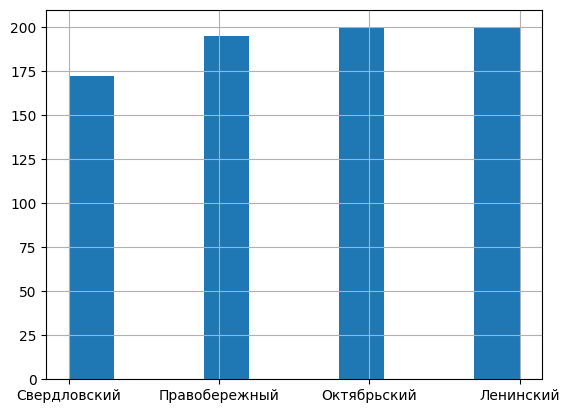

In [82]:
# районы
display(data['district'].value_counts())
data['district'].hist();

Больше всего продаются квартиры в Октябрьском и Ленинском районах

Просмотрим данные по стоблцу rooms

In [53]:
data['rooms'].unique()

array([2, 1, 3, 0, 4, 5])

По данным квартир с указаннием о количесве комнат = 0 можем сделать предположение, что данные квартиры являются новостройками со свободной планировкой. Оставим как есть.

rooms
1    539
2    128
3     63
0     21
4     15
5      1
Name: count, dtype: int64

<Axes: >

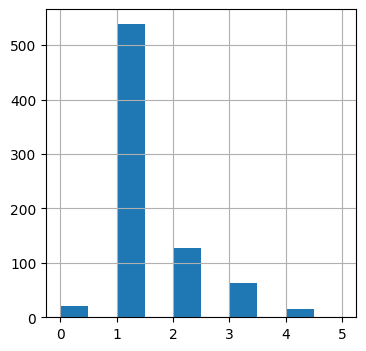

In [73]:
display(data['rooms'].value_counts()) #посчитаем количество квартир в зависимости от количества комнат
data['rooms'].hist(figsize=(4,4)) #построим диаграмму 

### Больше всего продается однокомнатных квартир 

In [85]:
category = data.groupby('rooms')['ID'].count().sort_values(ascending=False).reset_index()
category['%'] = 100*(category['ID'] / category['ID'].sum()).round(3)
category = category.rename(columns={'ID':'count'})
category

,rooms,count,%
0,1,539,70.3
1,2,128,16.7
2,3,63,8.2
3,0,21,2.7
4,4,15,2.0
5,5,1,0.1


In [105]:
data_district = data.pivot_table(index = 'district', values = 'ID', columns='rooms', aggfunc = 'count').reset_index()
data_district 

rooms,district,0,1,2,3,4,5
0,Ленинский,3.0,132.0,41.0,21.0,3.0,NaN
1,Октябрьский,11.0,140.0,31.0,14.0,4.0,NaN
2,Правобережный,NaN,168.0,11.0,11.0,5.0,NaN
3,Свердловский,7.0,99.0,45.0,17.0,3.0,1.0


In [98]:
# строим гистограммы 
import plotly.express as px
fig = px.histogram(data_district, # загружаем данные 
                   x=['0', '1', '2', '3', '4', '5'], # указываем столбец с данными для оси X 
                   y= 'district',
                   title='Распределение') # указываем заголовок 
fig.update_layout(yaxis_title ='Районы') # подпись для оси X 
fig.update_layout(xaxis_title ='Кол-во комнат') # подпись для оси Y 
fig.show(); # выводим график

ValueError: All arguments should have the same length. The length of column argument `df[y]` is 4, whereas the length of  previously-processed arguments ['x'] is 6